# BEST NEIGHBORHOOD IN PITTSBURGH
## Team Normandy SR2
### Introduction

Using the datasets provided by the WPRDC, we narrowed down the factors for the best neighborhood in Pittsburgh to:
   * A ratio of restrants to restraunt health violations
   * Crime Rate
   * Population

Restaurant data was included becuase typically a hallmark of a good neighborhood is good food, and places with good food typically have to follow certain rules, otherwise they get shut down.  So, the best way to figure this out is to find how many restaurants are in an area, and how many health violations those restraunts are accruing.  Crime rate was included becuase nobody wants to live somewhere where the crime rate is very high - it simply isn't safe.  Also, it suggests an overworked police force, another hallmark of a bad neighborhood.  Finally, population was included becuase both extremes should be avoided when it comes to neighborhoods - a neighborhood should be small enough your neighbors know you well enough if something were to happen to you, they would notice, but big enough the whole commmunity doesn't know your business.  A nice happy medium.  That being said, neighborhood sizes were not capped in this metric, as Pittsburgh is not big enough for that to be a concern.  There were small neighborhoods that were eliminated though.

I aslo found that some municipalities were represented as Pittsburgh-x (where x is an integer between 1 and 130) as well as the name of the actuall burogh/municipality. I used the following source to decipher these values into more understandable data and combine the data:
http://apps.alleghenycounty.us/website/munimap.asp

### The Metric
We determined our metric by looking for the following items, which are also narrated through the code:
#### Restraunt Data
For restraunt data, the violations were weighed and then divided by the number of restaurants.  I originally planned to use the following point system to analyze the violations: 
    * having a violation counted for 1 point
    * a low violoation was 2 points
    * a medium violation was 3 points
    * a high voilation was 4 points
Unfortunatley, I quickly discovered this system would not work, as, from glancing at the data, some violations were applications for liqour licences and other things, which shouldn't count against an establishment.  I therefore modified the weight of each section down 1, and then removed the weight for having a violation.  From there, the total violation points were added up per township.  To figure out hte total number of restaurants, a list of restraunt inspections was used, duplicate restraunt names were eliminated, then that was sorted by burogh as well.  Then teh number of violations was divided by the number of restaurants, giving a value that represented violations accrued per restaurant.  From doing this, I realized that some of the top results were buroghs that had very few restaurants....... not something I wanted, so I also removed any municipality with less than 150 restaurants.

As a side note, many neighborhoods of Pittsburgh are not on this list, so unfortunatley, this data was not as effective as I was hoping, so I reduced its weight in the comparison of neighborhoods, in favor of the next metric.  Also, occasionally appearing are "Pittsburgh-131" and "Pittsburgh-132" which don't actually appear in any municipality map of Pittsburgh, so they are being coinsidered outliers.

Winner: Oakmont

Loser: Richland

Not really surprised by the results here: Oakmont has one of the most popular bakeries in the area.

#### Crime Rate
The other factor taken into consideration was the crime rate.  The way I determined this metric was by burough population/total crimes.  This allowed me to compare the crime rate of different buroghs in a fair, impartial way.  SPECIAL NOTE: neighborhoods with under 200 people in it were removed as outliers.  Also, Mount Oliver and Mount Oliver Burogh were not included becuase there was no included crime data fror those two neighborhoods

Winner: Swisshelm Park

Loser: North Shore

I've honestly never heard of Swisshelm Park before, but the North Shore being the worst, not surprised about that.  There is a few infamous bars down there, as well as Heinz Field and PNC Park.

#### Population
I removed buroughs of a population under 3000 becuase I decided that a good neighborhood has a good amount of people in it, and isn't so small that EVERYONE knows your name... much more important are those couple highly frequented spots where everyone knows your name.

Winner: Squirell Hill North

Loser: There were a few..... (South Side Flats)

### The Best Neighborhood
Squirell Hill North, for the people living in the city, and Oakmont for those living outside.  Unfortunatly, I didn't have any crime data to judge the suburbs on, as they all have their own law enforcement, and they don't share data with the WPRDC yet, and I don't have any specific restaurant data for neighborhoods in the city, so I'm left to chose 2 winners based on the metrics.  

### Conclusion
Unsurprisingly, this is actually what I've been saying for years, at least as far as the best neighborhood in the city.  Squirell Hill North didn't surprise me in the slightest actually, as both districts in Squirell Hill are very desirable living places in the city.  I think the restaurant data was unfortunatly unhelpfull for looking inside the city limits, something I didn't expect.  I expected the crime results, and I'm actually very glad they showed exactly what I'd been saying for years. I think this is just the tip of the iceberg when it comes to analyzing neighborhoods though, and several other factors should be considered, like community events, community involvement, grocery stores, property size and values, and probably more besides.  Something I would have liked to look at is a month-by-month analysis of the crime rate as well, just to see if some places were trending up, thus rendering them not good neighborhoods, or trending down, suggesting that that neighborhood could actually be improving, and not bad to move into.  I was having major issues getting that to work properly, however, with more experience that could be figured out.  It was very rewarding to be able to manipulate huge datasets to do things that in other formats would have taken tons of time and tons more work, compared to a couple lines of code.




## THE DATA

We start by importing pandas and getting matplotlib ready to go.  Then we import the data as follows:

rest_csv -> restvio_data = This is the restaurant violation data

tot_rest_csv -> restaurant_data = This is the total restaurant data

tot_pop_csv -> totPop = This is the total population of the different neighborhoods

tot_crime_csv -> totCrime = This is the crime data

In [1]:
import pandas as pd
%matplotlib inline

rest_csv = "https://data.wprdc.org/dataset/8744b4f6-5525-49be-9054-401a2c4c2fac/resource/1a1329e2-418c-4bd3-af2c-cc334e7559af/download/restaurantinspectionviolationsalt.csv"
restvio_data = pd.read_csv(rest_csv, encoding="latin1")

tot_rest_csv="https://data.wprdc.org/dataset/8744b4f6-5525-49be-9054-401a2c4c2fac/resource/410f80a1-d18c-44f3-9964-2205b2ea7f5a/download/alco-restaurant-inspections-all.csv"
restaurant_data = pd.read_csv(tot_rest_csv, encoding="latin1")

tot_pop_csv="https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv"
totPop = pd.read_csv(tot_pop_csv, encoding="latin1")

tot_crime_csv="https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e"
totCrime = pd.read_csv(tot_crime_csv, encoding="latin1")

totCrime = totCrime.rename(columns={'INCIDENTNEIGHBORHOOD': 'Neighborhood'})
crime = totCrime.groupby('Neighborhood').size()

#### Restaurant data analysis
Here we eliminate every violation that is not logged as either high, medium, or low, as well as apply a weight to each level of violations such that low = 1, medium = 2, and high = 3.  


In [25]:
lows = restvio_data['LOW'] == "T"
mediums = restvio_data['MEDIUM'] == "T"
highs = restvio_data['HIGH'] == "T"

violations = restvio_data[lows | mediums | highs]


violations['LOW'].replace({'T':1, 'F':0},inplace=True)
violations['MEDIUM'].replace({'T':2, 'F':0},inplace=True)
violations['HIGH'].replace({'T':3, 'F':0},inplace=True)
violations['LOW'] = violations['LOW'].fillna(0)
violations['MEDIUM'] = violations['MEDIUM'].fillna(0)
violations['HIGH'] = violations['HIGH'].fillna(0)
violations['VIOLATIONS'] = violations.apply(lambda row: row.LOW + row.MEDIUM + row.HIGH, axis=1)

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Here we had to replace names of municipalities that were logged slightly differently than the rest of the entries

In [3]:
violations['MUNICIPAL'].replace({'Pittsburgh-130':'Wilmerding', 'Pittsburgh-129':'Wilkinsburg', 'Pittsburgh-128':'Wilkins', 'Pittsburgh-127':'Whitehall', 'Pittsburgh-126':'White Oak'},inplace=True)
violations['MUNICIPAL'].replace({'Pittsburgh-125':'Whitaker', 'Pittsburgh-124':'West View', 'Pittsburgh-123':'West Mifflin', 'Pittsburgh-122':'West Homestead', 'Pittsburgh-121':'West Elizabeth'},inplace=True)
violations['MUNICIPAL'].replace({'Pittsburgh-120':'West Deer', 'Pittsburgh-119':'Wall', 'Pittsburgh-118':'Versailles', 'Pittsburgh-117':'Verona', 'Pittsburgh-116':'Upper St. Clair'},inplace=True)
violations['MUNICIPAL'].replace({'Pittsburgh-115':'Turtle Creek', 'Pittsburgh-114':'Trafford', 'Pittsburgh-113':'Thornburg', 'Pittsburgh-112':'Tarentum', 'Pittsburgh-111':'Swissvale'},inplace=True)
violations['MUNICIPAL'].replace({'Pittsburgh-110':'Stowe', 'Pittsburgh-109':'Springdale Borough', 'Pittsburgh-108':'Springdale Township', 'Pittsburgh-107':'South Versailles', 'Pittsburgh-106':'South Park'},inplace=True)
violations['MUNICIPAL'].replace({'Pittsburgh-105':'South Fayette', 'Pittsburgh-104':'Sharpsburg', 'Pittsburgh-103':'Shaler', 'Pittsburgh-102':'Sewickley Hills', 'Pittsburgh-101':'Sewickley Heights', 'Pittsburgh-100':'Sewickley'},inplace=True)

total_rest = restaurant_data.drop_duplicates(subset='facility_name', keep="first")

total_rest['municipal'].replace({'Pittsburgh-130':'Wilmerding', 'Pittsburgh-129':'Wilkinsburg', 'Pittsburgh-128':'Wilkins', 'Pittsburgh-127':'Whitehall', 'Pittsburgh-126':'White Oak'},inplace=True)
total_rest['municipal'].replace({'Pittsburgh-125':'Whitaker', 'Pittsburgh-124':'West View', 'Pittsburgh-123':'West Mifflin', 'Pittsburgh-122':'West Homestead', 'Pittsburgh-121':'West Elizabeth'},inplace=True)
total_rest['municipal'].replace({'Pittsburgh-120':'West Deer', 'Pittsburgh-119':'Wall', 'Pittsburgh-118':'Versailles', 'Pittsburgh-117':'Verona', 'Pittsburgh-116':'Upper St. Clair'},inplace=True)
total_rest['municipal'].replace({'Pittsburgh-115':'Turtle Creek', 'Pittsburgh-114':'Trafford', 'Pittsburgh-113':'Thornburg', 'Pittsburgh-112':'Tarentum', 'Pittsburgh-111':'Swissvale'},inplace=True)
total_rest['municipal'].replace({'Pittsburgh-110':'Stowe', 'Pittsburgh-109':'Springdale Borough', 'Pittsburgh-108':'Springdale Township', 'Pittsburgh-107':'South Versailles', 'Pittsburgh-106':'South Park'},inplace=True)
total_rest['municipal'].replace({'Pittsburgh-105':'South Fayette', 'Pittsburgh-104':'Sharpsburg', 'Pittsburgh-103':'Shaler', 'Pittsburgh-102':'Sewickley Hills', 'Pittsburgh-101':'Sewickley Heights', 'Pittsburgh-100':'Sewickley'},inplace=True)

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Now we can get the top 5 neighborhoods by the restaurant data (# violations/# restraunts)

In [6]:
rest_subsets = violations[["MUNICIPAL", "VIOLATIONS"]]

restaurants = pd.DataFrame()
restaurants["NUM_RESTAURANTS"] = rest_subsets.groupby("MUNICIPAL").size()
restaurants["VIOLATIONS"] = rest_subsets.groupby("MUNICIPAL")['VIOLATIONS'].sum()
restaurants['VIOLATIONS_PER_RESTAURANT'] = restaurants.apply(lambda row: row.VIOLATIONS / row.NUM_RESTAURANTS, axis=1)

restaurants = restaurants.loc[restaurants['NUM_RESTAURANTS'] > 150]
restaurants.sort_values(by=['VIOLATIONS_PER_RESTAURANT'], ascending=True).head(5)


,NUM_RESTAURANTS,VIOLATIONS,VIOLATIONS_PER_RESTAURANT
MUNICIPAL,,,
Oakmont,1546,1867.0,1.207633
O'Hara,1578,1937.0,1.227503
Plum,2565,3176.0,1.238207
Portvue,189,235.0,1.243386
Upper St Clair,978,1259.0,1.287321


And, recipricoally, the worst 5 restaurants following the same metric as above

In [7]:
restaurants.sort_values(by=['VIOLATIONS_PER_RESTAURANT'], ascending=False).head(5)

,NUM_RESTAURANTS,VIOLATIONS,VIOLATIONS_PER_RESTAURANT
MUNICIPAL,,,
Richland,836,1487.0,1.778708
Harrison,441,780.0,1.768707
Hampton,763,1328.0,1.740498
Pine,1203,2066.0,1.717373
McCandless,1940,3326.0,1.714433


#### Crime Rate
The following code calculates the "Total Rate" of crime in each neighborhood using the crime data from 2016-present, (total crimes in the neighborhood since 2016/total population), and removing any neighborhood with a population less than 200.  Then we can see the top 5 neighborhoods by crime rate

In [24]:
crimeRate = totPop.drop(['Margin of Error; Total', 'Estimate; Total'], axis=1)
crimeRate['Population'] = totPop['Estimate; Total']
crimeRate = crimeRate.set_index('Neighborhood')
crimeRate['Total_Crime'] = totCrime.groupby('Neighborhood').size()
crimeRate['Total_Rate'] = crimeRate.apply(lambda row: row.Total_Crime / row.Population, axis=1)
crimeRate = crimeRate.loc[crimeRate['Population'] > 200]
crimeRate2 = crimeRate.loc[crimeRate['Population'] > 3000]
topHoods = crimeRate2.sort_values(by=['Total_Rate'], ascending=True).head(25)
crimeRate.sort_values(by=['Total_Rate'], ascending=True).head(5)

,Id,Population,Total_Crime,Total_Rate
Neighborhood,,,,
Swisshelm Park,83,1345.0,183.0,0.136059
New Homestead,56,973.0,134.0,0.137718
Duquesne Heights,25,2522.0,374.0,0.148295
Squirrel Hill North,77,11336.0,1836.0,0.161962
Stanton Heights,80,4761.0,775.0,0.162781


This code just shows the worst 5 of the crime rate table

In [10]:
crimeRate.sort_values(by=['Total_Rate'], ascending=False).head(5)

,Id,Population,Total_Crime,Total_Rate
Neighborhood,,,,
North Shore,58,205.0,1687.0,8.229268
West End,88,235.0,436.0,1.855319
Allegheny West,2,343.0,633.0,1.845481
St. Clair,79,270.0,492.0,1.822222
Strip District,81,747.0,1226.0,1.641232


#### Population
Now, we take the crime rate data, and can trim by the population, keeping only those neighborhoods that are above 3000 inhabitants.

In [11]:
crimeRate2.sort_values(by=['Total_Rate'], ascending=True).head(5)

,Id,Population,Total_Crime,Total_Rate
Neighborhood,,,,
Squirrel Hill North,77,11336.0,1836.0,0.161962
Stanton Heights,80,4761.0,775.0,0.162781
Greenfield,37,7690.0,1264.0,0.164369
Banksville,6,3858.0,677.0,0.175480
Morningside,52,3262.0,587.0,0.179951


Then we can also see the worst 5 as well

In [13]:
crimeRate2.sort_values(by=['Total_Rate'], ascending=False).head(5)

,Id,Population,Total_Crime,Total_Rate
Neighborhood,,,,
South Side Flats,73,6292.0,8789.0,1.396853
Central Business District,17,4060.0,5105.0,1.257389
Homewood North,41,3371.0,2588.0,0.767725
Knoxville,44,4255.0,3029.0,0.711868
Lincoln-Lemington-Belmar,47,4955.0,2985.0,0.602422


#### Visual representations
Side by side bar graph of Population and Total Crime, the left bar of the pair is populaiton, the right bar of the pair is Total Crime.

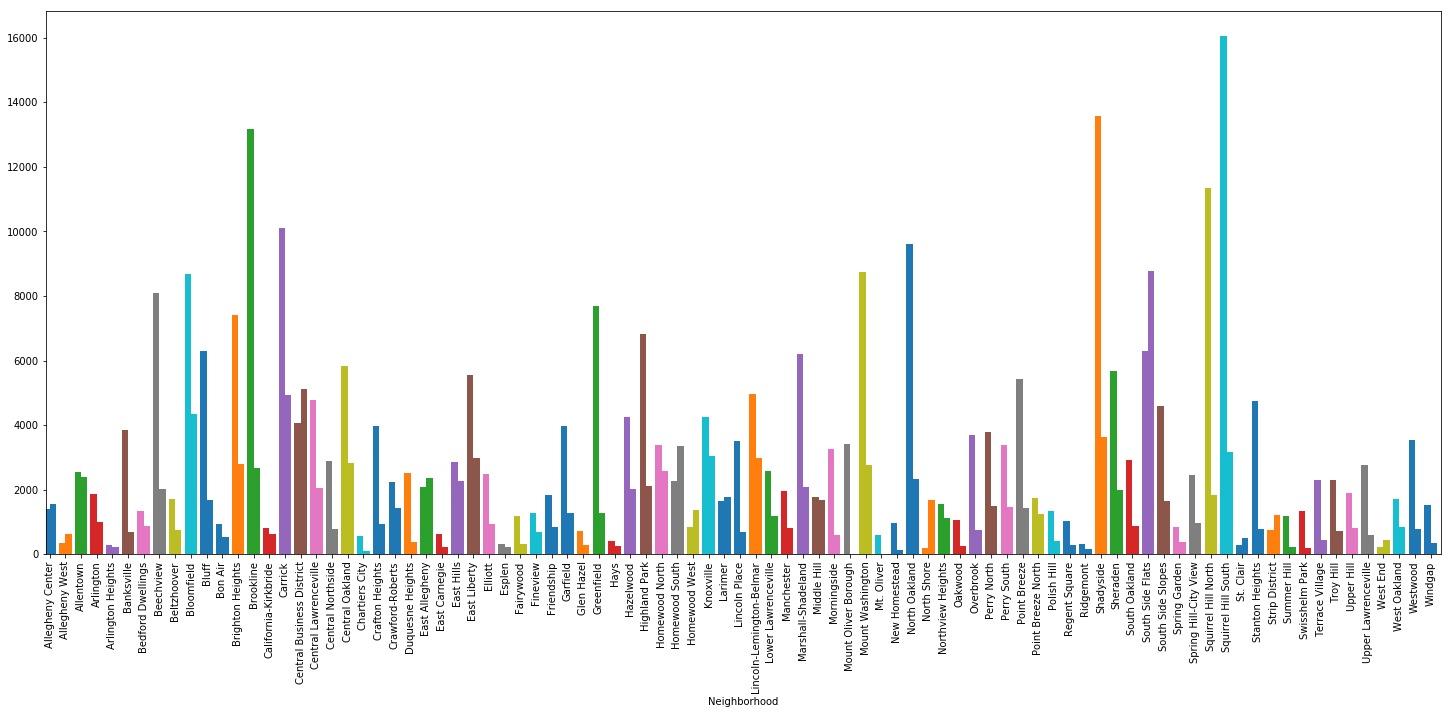

In [15]:
crimeRate['Population'].plot(kind="bar", width = .4, figsize=(25,10), position=1)
crimeRate['Total_Crime'].plot(kind="bar", width = .4, position=0)

This is bar graph just comparing crime rate, capped at a 1, in order to see it better.

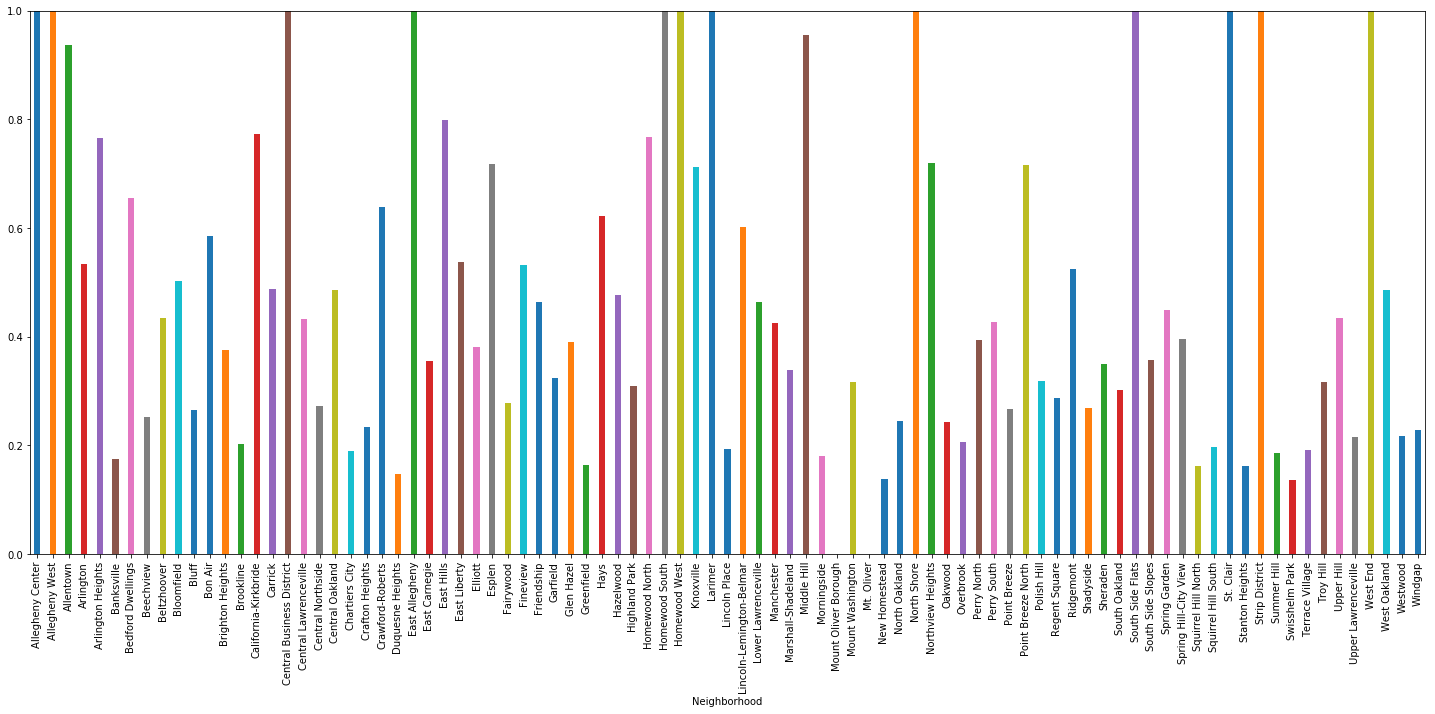

In [16]:
crimeRate['Total_Rate'].plot(kind="bar", width = .4, figsize=(25,10), ylim =(0,1))

#### The Top 25
Here are the top 25 neighborhoods in Pittsburgh, ranked

In [17]:
restaurants.rename_axis("Neighborhood")
topHoods['Violations_Per_Restaurant'] = restaurants['VIOLATIONS_PER_RESTAURANT']
topHoods

,Id,Population,Total_Crime,Total_Rate,Violations_Per_Restaurant
Neighborhood,,,,,
Squirrel Hill North,77,11336.0,1836.0,0.161962,NaN
Stanton Heights,80,4761.0,775.0,0.162781,NaN
Greenfield,37,7690.0,1264.0,0.164369,NaN
Banksville,6,3858.0,677.0,0.175480,NaN
Morningside,52,3262.0,587.0,0.179951,NaN
Lincoln Place,46,3499.0,679.0,0.194055,NaN
Squirrel Hill South,78,16042.0,3160.0,0.196983,NaN
Brookline,14,13160.0,2666.0,0.202584,NaN
Overbrook,61,3682.0,760.0,0.206410,NaN


##### Visual representations of the top 25
Narrowing down the results to just the top 25, a side by side bar graph of Population and Total Crime, the left bar of the pair is populaiton, the right bar of the pair is Total Crime

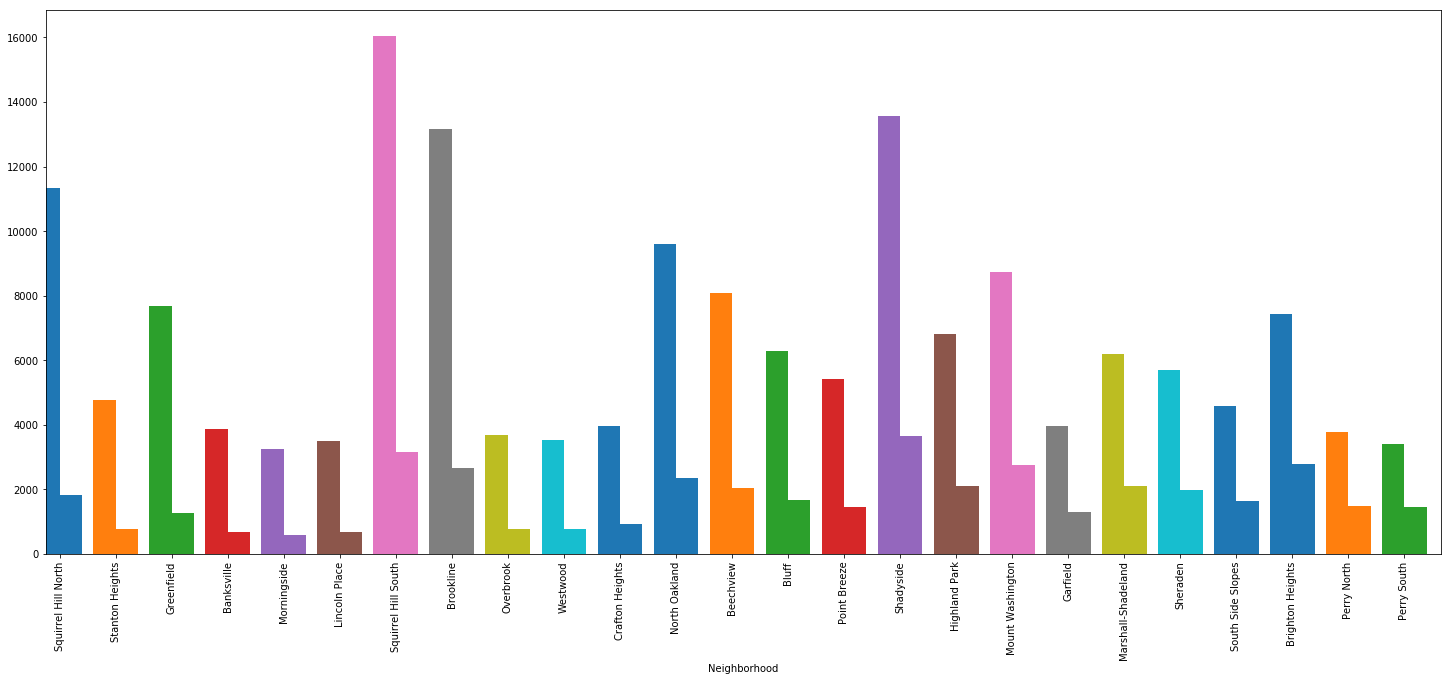

In [18]:
topHoods['Population'].plot(kind="bar", width = .4, figsize=(25,10), position=1)
topHoods['Total_Crime'].plot(kind="bar", width = .4, position=0)

And a bar graph by crime rate, capped at .45, less than half the crime rate used to be able to visualize the overall data

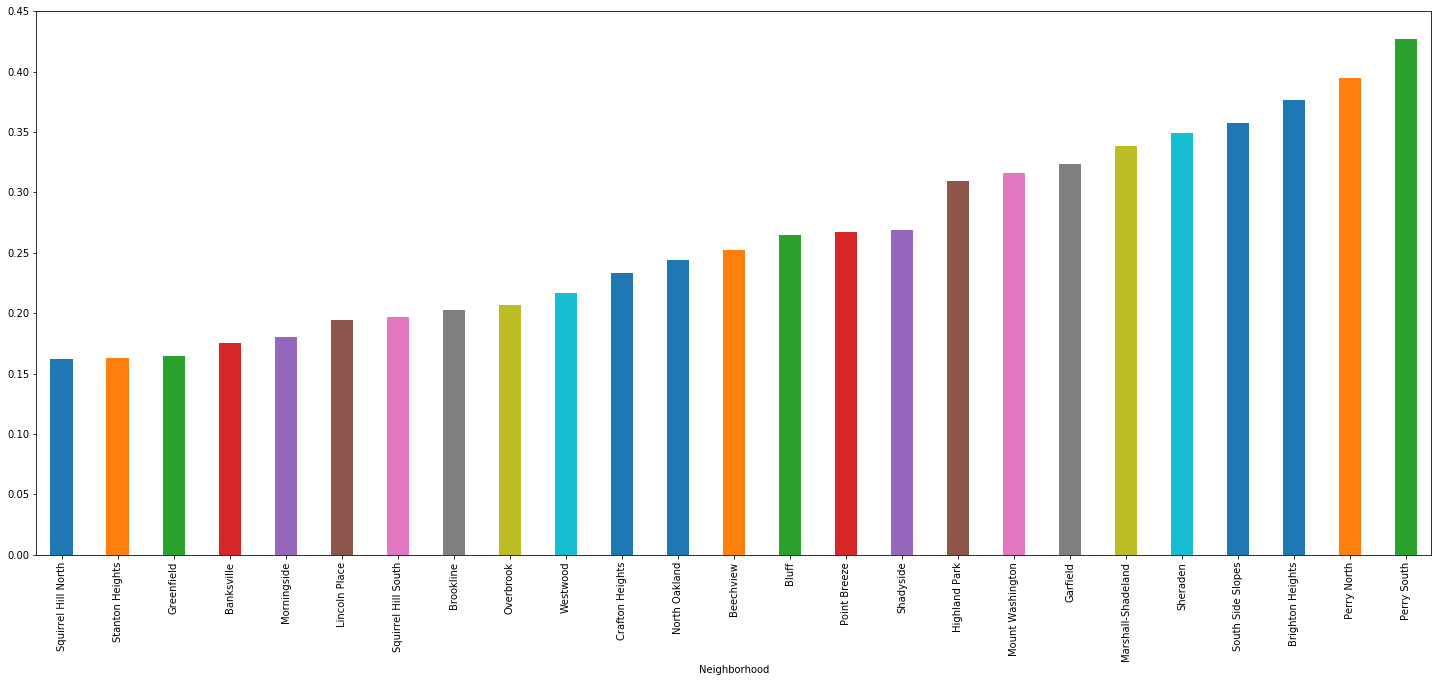

In [23]:
topHoods['Total_Rate'].plot(kind="bar", width = .4, figsize=(25,10), ylim =(0,0.45))